In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-and-health-data-2014-2024/World_Population_and_Health.csv


# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/world-population-and-health-data-2014-2024/World_Population_and_Health.csv")

In [3]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.0,19.3
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.0,4.5
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.0,2.7
3,Andorra,2014,133274038,AND,6.773080,NaN,NaN,3.5,1.9,3.8,NaN,9.4,NaN
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Uruguay,2023,69805797,URY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN
1666,Uzbekistan,2023,162931600,UZB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN
1667,Vanuatu,2023,84186452,VUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN
1668,Zambia,2023,184919566,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.0,NaN


In [4]:
df = df.dropna()

In [5]:
df

,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.00,19.3
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.00,4.5
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.00,2.7
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.00,13.0
6,Argentina,2014,93460762,ARG,9.671300,76.755,42.0,10.9,7.1,12.2,0.4,25.00,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,Uganda,2020,114314194,UGA,4.301986,62.851,284.0,32.1,19.4,43.6,5.4,199.00,37.1
1162,United Arab Emirates,2020,41741278,ARE,5.824770,78.946,9.0,4.8,3.0,5.9,0.1,0.75,3.1
1164,Uruguay,2020,65570632,URY,9.136885,78.430,19.0,6.0,4.7,7.0,0.6,33.00,2.5
1167,Zambia,2020,170399285,ZMB,6.316198,62.380,135.0,40.9,25.0,59.3,11.8,319.00,32.9


In [6]:
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 83.7 MB/s eta 0:00:00


In [7]:
import pycountry_convert as pc

def get_continent(country_code: str) -> str:
    """
    Determines the continent of a country based on its country code.

    This function uses the `pycountry_convert` library to convert the provided
    country code to a continent name. If the country code is not found or
    an error occurs during the conversion process, it returns "Unknown".

    Args:
        country_code: The 3-letter ISO country code (e.g., "USA").

    Returns:
        The name of the continent the country belongs to, or "Unknown" if
        the continent cannot be determined.
    """

    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

In [8]:
df.loc[:, 'continent'] = df['country_code'].apply(get_continent)
df

<ipython-input-8-5e3ea1f97cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'continent'] = df['country_code'].apply(get_continent)


,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment,continent
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.00,19.3,Asia
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.00,4.5,Europe
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.00,2.7,Africa
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.00,13.0,Africa
6,Argentina,2014,93460762,ARG,9.671300,76.755,42.0,10.9,7.1,12.2,0.4,25.00,2.8,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,Uganda,2020,114314194,UGA,4.301986,62.851,284.0,32.1,19.4,43.6,5.4,199.00,37.1,Africa
1162,United Arab Emirates,2020,41741278,ARE,5.824770,78.946,9.0,4.8,3.0,5.9,0.1,0.75,3.1,Asia
1164,Uruguay,2020,65570632,URY,9.136885,78.430,19.0,6.0,4.7,7.0,0.6,33.00,2.5,South America
1167,Zambia,2020,170399285,ZMB,6.316198,62.380,135.0,40.9,25.0,59.3,11.8,319.00,32.9,Africa


In [9]:
import requests
import pycountry

def is_developing_country(country_code: str) -> bool | None:
    """
    Checks if a country is a developing country based on its country code.

    This function uses the World Bank API to retrieve income level data for the given country code.
    It considers countries with 'Low income', 'Lower middle income', or 'Upper middle income'
    as developing countries.

    Args:
        country_code: The 3-letter ISO country code (e.g., 'USA').

    Returns:
        True if the country is developing, False if developed,
        or None if there is an error or the data is not found.
    """

    url = f'http://api.worldbank.org/v2/country/{country_code}?format=json'
    response = requests.get(url)
    data = response.json()

    try:
        if data[1][0]['incomeLevel']['value'] in ['Low income', 'Lower middle income', 'Upper middle income']:
            return True
        else:
            return False
    except:
        return None

In [10]:
df.loc[:, 'is_developing'] = df['country_code'].apply(is_developing_country)
df

<ipython-input-10-eef32bd4bccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'is_developing'] = df['country_code'].apply(is_developing_country)


,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment,continent,is_developing
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.00,19.3,Asia,True
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.00,4.5,Europe,True
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.00,2.7,Africa,True
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.00,13.0,Africa,True
6,Argentina,2014,93460762,ARG,9.671300,76.755,42.0,10.9,7.1,12.2,0.4,25.00,2.8,South America,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,Uganda,2020,114314194,UGA,4.301986,62.851,284.0,32.1,19.4,43.6,5.4,199.00,37.1,Africa,True
1162,United Arab Emirates,2020,41741278,ARE,5.824770,78.946,9.0,4.8,3.0,5.9,0.1,0.75,3.1,Asia,False
1164,Uruguay,2020,65570632,URY,9.136885,78.430,19.0,6.0,4.7,7.0,0.6,33.00,2.5,South America,False
1167,Zambia,2020,170399285,ZMB,6.316198,62.380,135.0,40.9,25.0,59.3,11.8,319.00,32.9,Africa,True


# Exploratory Data Analysis

In [11]:
df.describe()

,Year,Population,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
count,848.000000,8.480000e+02,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,2017.003538,7.847115e+07,6.591285,71.644066,155.831368,23.055896,13.895637,31.150708,1.734552,121.939292,10.013797
std,2.002652,4.620134e+07,2.552676,7.681613,208.226862,20.372068,11.024570,30.987433,4.207681,157.678586,9.668200
min,2014.000000,2.285000e+06,1.818817,50.566000,1.000000,1.700000,0.900000,2.100000,0.100000,0.000000,2.500000
25%,2015.000000,3.884767e+07,4.572592,65.307000,13.000000,6.075000,4.100000,7.275000,0.100000,15.000000,2.500000
50%,2017.000000,7.321663e+07,6.492059,73.100500,63.000000,15.400000,10.550000,17.850000,0.400000,51.000000,6.000000
75%,2019.000000,1.150427e+08,8.282469,77.568000,228.250000,35.400000,23.025000,47.625000,1.100000,177.000000,14.400000
max,2020.000000,1.758539e+08,19.690046,83.904878,1223.000000,95.800000,46.400000,140.500000,29.900000,1070.000000,45.100000


In [12]:
continuous_cols = df.select_dtypes(include=['number']).columns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

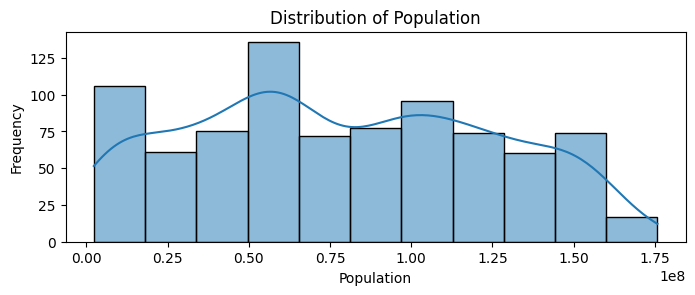

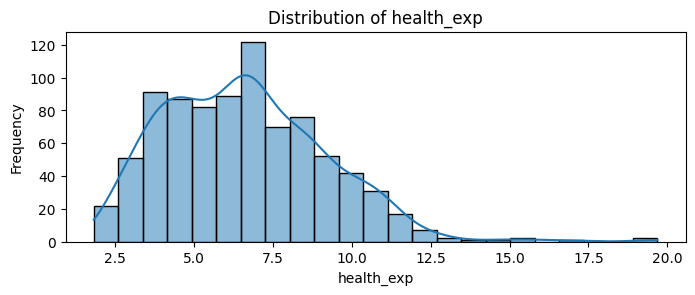

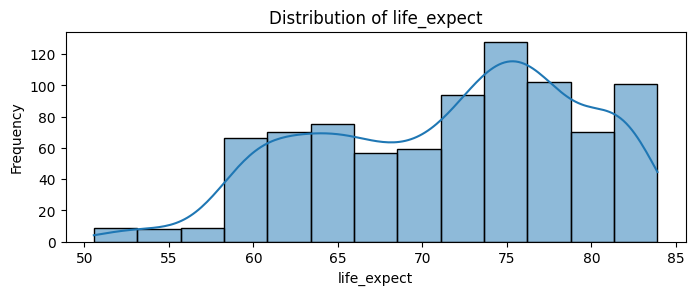

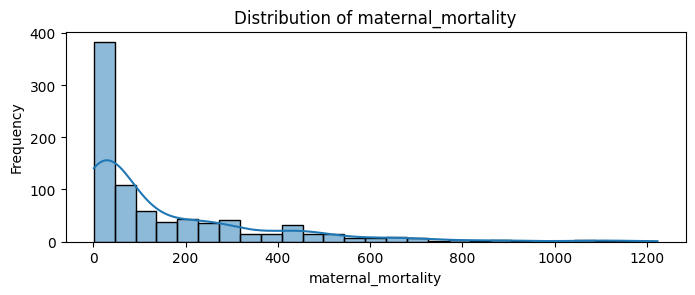

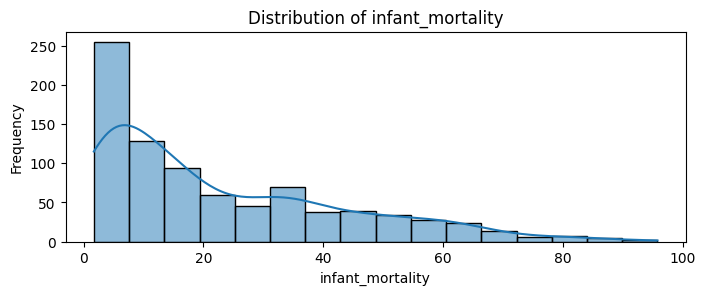

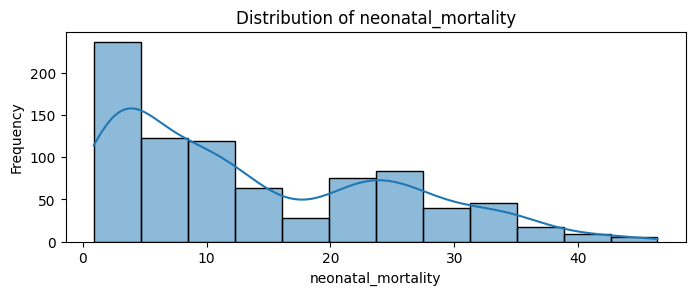

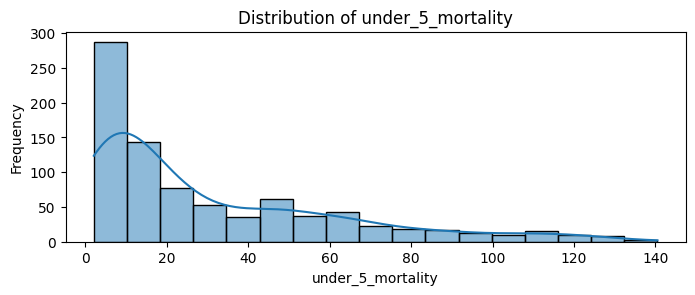

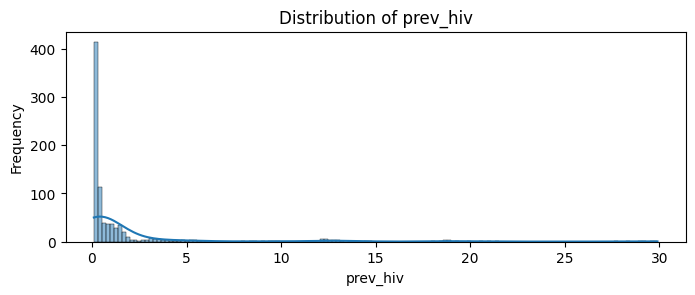

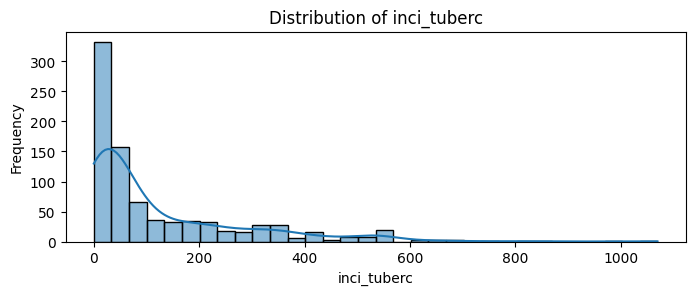

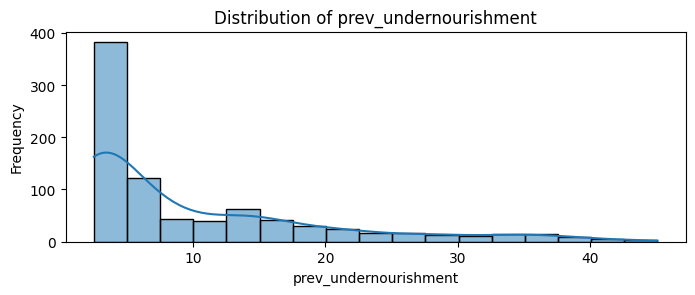

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in continuous_cols:
    if col == 'Year':
        continue

    plt.figure(figsize=(8, 6))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

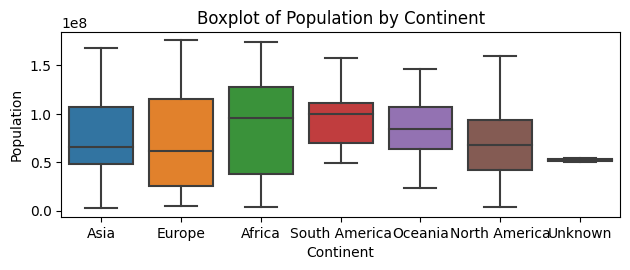

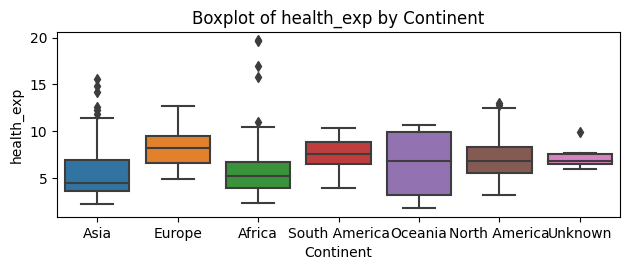

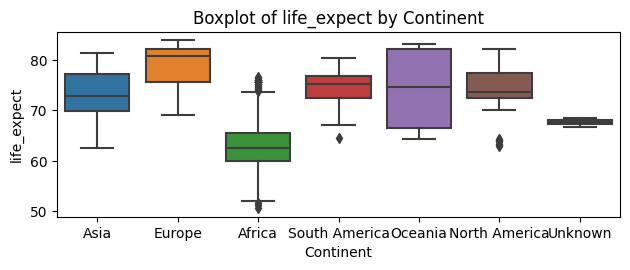

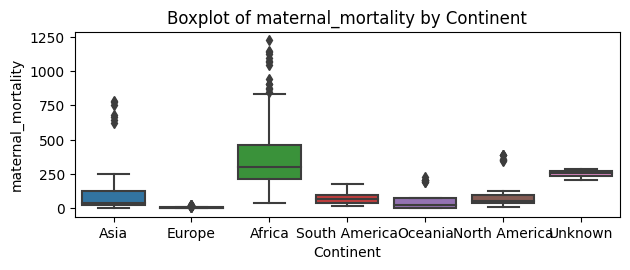

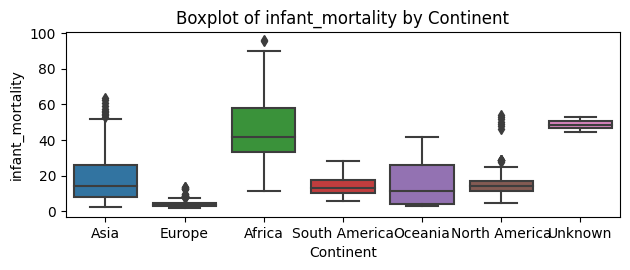

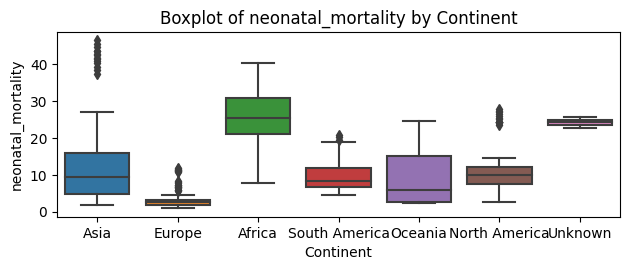

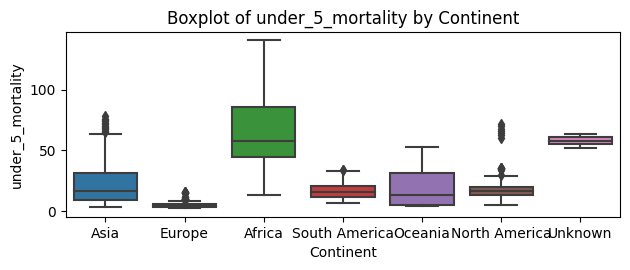

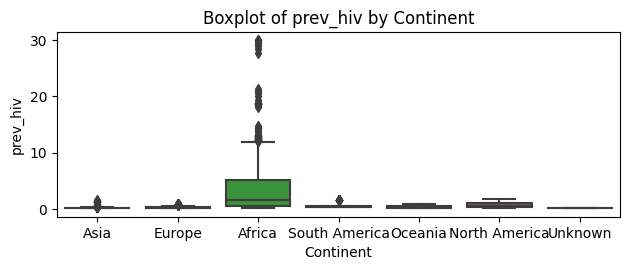

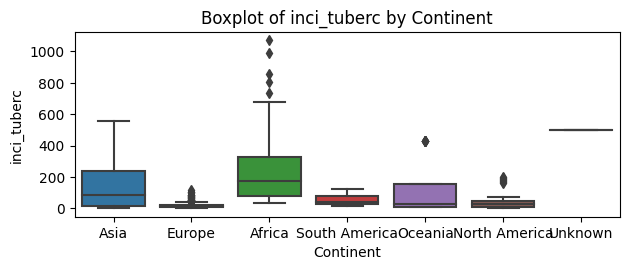

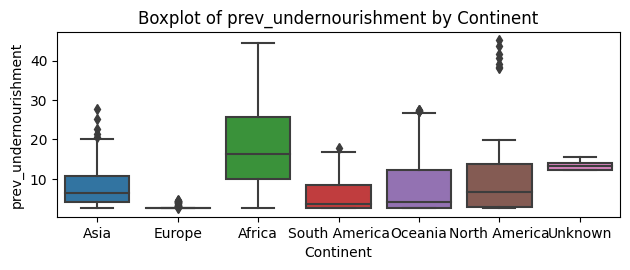

In [14]:
for col in continuous_cols:
    if col == 'Year':
        continue

    # Boxplot
    plt.subplot(2, 1, 2)
    sns.boxplot(x='continent', y=col, data=df)
    plt.title(f'Boxplot of {col} by Continent')
    plt.xlabel('Continent')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# Hypothesis Testing

## Hypothesis 1
Life expectancy is the same in developing and non-developed countries.

In [15]:
from scipy import stats

# Developing countries life expectancy
developing_life_expectancy = df[df['is_developing'] == True]['life_expect']

# Non-developing countries life expectancy
non_developing_life_expectancy = df[df['is_developing'] == False]['life_expect']

# Perform two-sample z-test
z_statistic, p_value = stats.ttest_ind(developing_life_expectancy, non_developing_life_expectancy)

print(f'Z-statistic: {z_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05  # Significance level

if p_value < alpha:
    print('Reject the null hypothesis.')
    print('There is statistically significant evidence to suggest that life expectancy is different in developing and non-developed countries.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is not enough statistically significant evidence to suggest that life expectancy is different in developing and non-developed countries.')

Z-statistic: -25.361342849094424
P-value: 5.47740321982477e-106
Reject the null hypothesis.
There is statistically significant evidence to suggest that life expectancy is different in developing and non-developed countries.


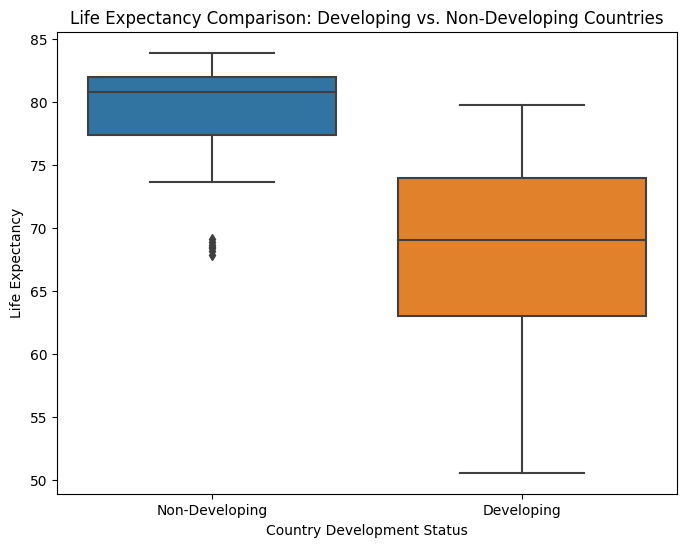

In [16]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_developing', y='life_expect', data=df)
plt.title('Life Expectancy Comparison: Developing vs. Non-Developing Countries')
plt.xlabel('Country Development Status')
plt.ylabel('Life Expectancy')
plt.xticks([0, 1], ['Non-Developing', 'Developing'])  # Set custom x-axis tick labels
plt.show()

## Hypothesis 2
Percentage of GDP spent on healthcare in Asia in 2020 is same as it was in 2015.

In [17]:
asia_df = df[df['continent'] == 'Asia']

asia_2015 = asia_df[asia_df['Year'] == 2015]['health_exp']
asia_2020 = asia_df[asia_df['Year'] == 2020]['health_exp']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(asia_2020, asia_2015, alternative='greater')

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05  # Significance level

if p_value < alpha:
    print('Reject the null hypothesis.')
    print('There is statistically significant evidence to support the claim that the percentage of GDP spent on healthcare in Asia in 2020 is higher than in 2015.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is not enough statistically significant evidence to support the claim that the percentage of GDP spent on healthcare in Asia in 2020 is higher than in 2015.')

T-statistic: 1.4564055199532582
P-value: 0.07603638759705993
Fail to reject the null hypothesis.
There is not enough statistically significant evidence to support the claim that the percentage of GDP spent on healthcare in Asia in 2020 is higher than in 2015.


## Hypothesis 3
There is no difference in average life expectancy by continent.

In [18]:
# Perform ANOVA test
groups = df.groupby('continent')['life_expect'].apply(list)
fvalue, pvalue = stats.f_oneway(*groups)

print(f'F-value: {fvalue}')
print(f'P-value: {pvalue}')

alpha = 0.05  # Significance level

if pvalue < alpha:
    print('Reject the null hypothesis.')
    print('There is a statistically significant difference in average life expectancy by continent.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is not enough statistically significant evidence to reject the null hypothesis that there is no difference in average life expectancy by continent.')

F-value: 241.53557220075294
P-value: 4.001095926626392e-179
Reject the null hypothesis.
There is a statistically significant difference in average life expectancy by continent.


# Correlation Testing

## Pearson correlation test

In [19]:
correlation_coefficient, p_value = stats.pearsonr(df['life_expect'], df['health_exp'])

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant correlation between life expectancy and health expenditure.')
    if correlation_coefficient > 0:
        print('The correlation is positive, indicating that as health expenditure increases, life expectancy tends to increase.')
    else:
        print('The correlation is negative, indicating that as health expenditure increases, life expectancy tends to decrease.')
else:
    print('There is no statistically significant correlation between life expectancy and health expenditure.')

Pearson Correlation Coefficient: 0.37152992952732056
P-value: 3.7775876853049327e-29
There is a statistically significant correlation between life expectancy and health expenditure.
The correlation is positive, indicating that as health expenditure increases, life expectancy tends to increase.


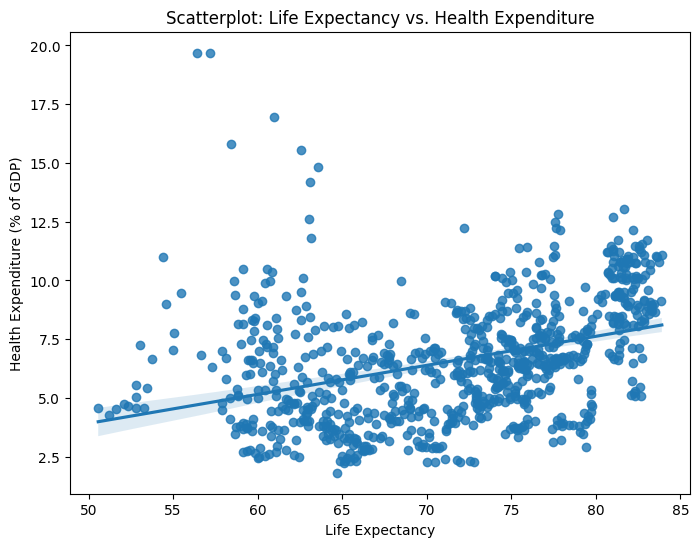

In [20]:
# Visualize the correlation using a scatterplot
plt.figure(figsize=(8, 6))
sns.regplot(x='life_expect', y='health_exp', data=df)
plt.title('Scatterplot: Life Expectancy vs. Health Expenditure')
plt.xlabel('Life Expectancy')
plt.ylabel('Health Expenditure (% of GDP)')
plt.show()

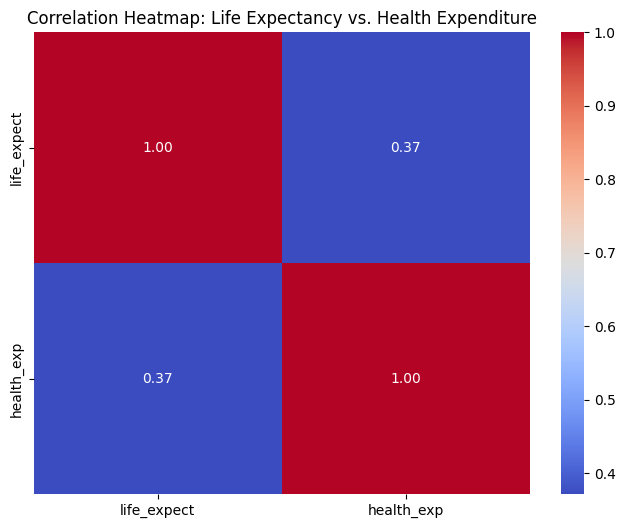

In [21]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['life_expect', 'health_exp']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Life Expectancy vs. Health Expenditure')
plt.show()

## Spearman correlation test

In [22]:
# Calculate Spearman's rank correlation
correlation_coefficient, p_value = stats.spearmanr(df['health_exp'], df['infant_mortality'])

print(f"Spearman's Rank Correlation Coefficient: {correlation_coefficient}")
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant correlation between health_exp and infant_mortality.')
    if correlation_coefficient > 0:
        print('The correlation is positive, indicating that as health_exp increases, infant_mortality to increase.')
    else:
        print('The correlation is negative, indicating that as health_exp increases, infant_mortality tends to decrease.')
else:
    print('There is no statistically significant correlation between health_exp and infant_mortality.')

Spearman's Rank Correlation Coefficient: -0.4626940176765168
P-value: 3.2708876029882075e-46
There is a statistically significant correlation between health_exp and infant_mortality.
The correlation is negative, indicating that as health_exp increases, infant_mortality tends to decrease.


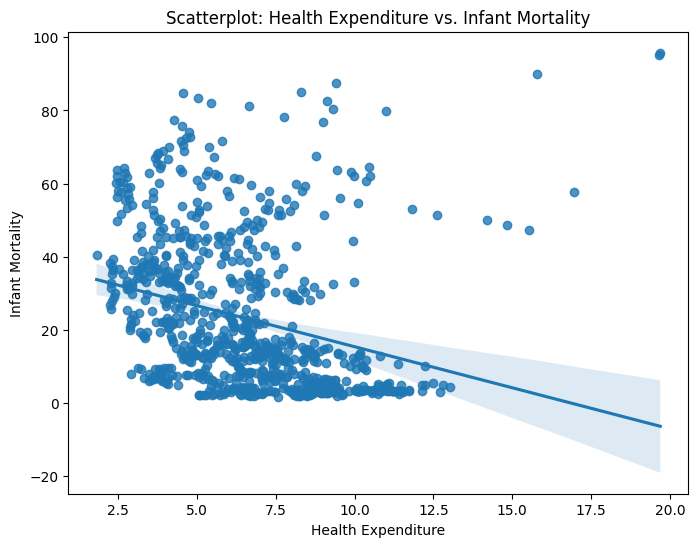

In [23]:
# Visualize the correlation using a scatterplot
plt.figure(figsize=(8, 6))
sns.regplot(x='health_exp', y='infant_mortality', data=df)
plt.title('Scatterplot: Health Expenditure vs. Infant Mortality')
plt.xlabel('Health Expenditure')
plt.ylabel('Infant Mortality')
plt.show()

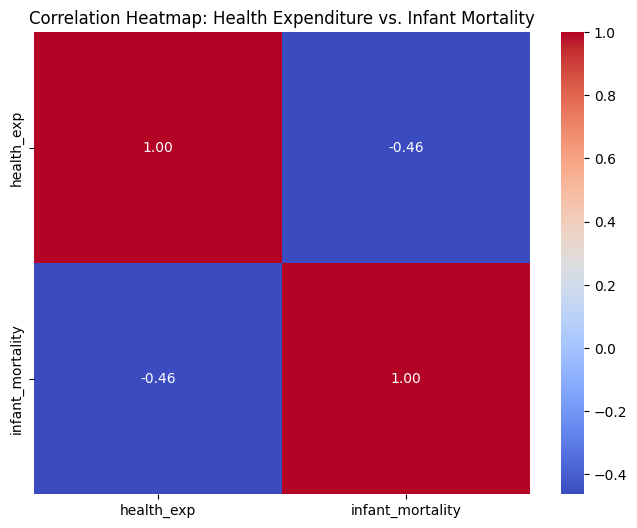

In [24]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['health_exp', 'infant_mortality']].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Health Expenditure vs. Infant Mortality')
plt.show()

## Point-Biserial correlation

In [25]:
correlation_coefficient, p_value = stats.pointbiserialr(df['life_expect'], df['is_developing'])
print(f'Point-Biserial Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

alpha = 0.05

if p_value < alpha:
    print('There is a statistically significant correlation between life expectancy and whether a country is developing.')
    if correlation_coefficient > 0:
        print('The correlation is positive, indicating that developing countries tend to have higher life expectancy.')
    else:
        print('The correlation is negative, indicating that developing countries tend to have lower life expectancy.')
else:
    print('There is no statistically significant correlation between life expectancy and whether a country is developing.')

Point-Biserial Correlation Coefficient: -0.6571977457729907
P-value: 5.477403219821015e-106
There is a statistically significant correlation between life expectancy and whether a country is developing.
The correlation is negative, indicating that developing countries tend to have lower life expectancy.


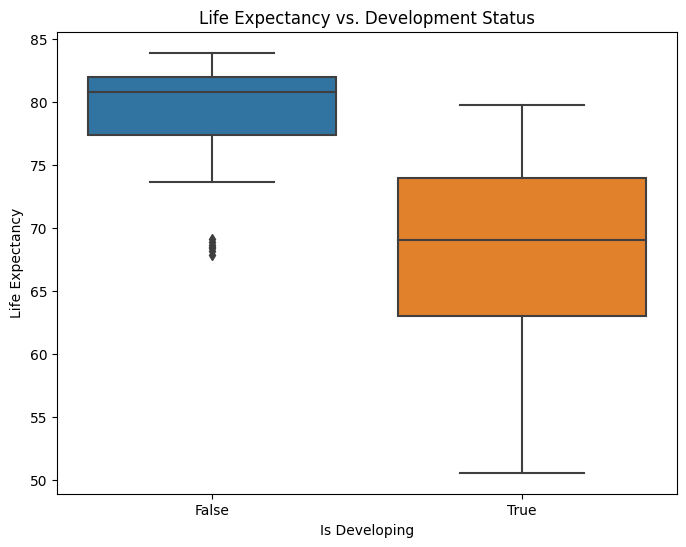

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_developing', y='life_expect', data=df)
plt.title('Life Expectancy vs. Development Status')
plt.xlabel('Is Developing')
plt.ylabel('Life Expectancy')
plt.show()

## Phi coefficient

In [27]:
df.loc[:, 'high_life_expectancy'] = df['life_expect'].apply(lambda x: True if x > 75 else False)
df

<ipython-input-27-d0cb808d137a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'high_life_expectancy'] = df['life_expect'].apply(lambda x: True if x > 75 else False)


,Country,Year,Population,country_code,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment,continent,is_developing,high_life_expectancy
0,Afghanistan,2014,56805036,AFG,9.528878,62.545,785.0,56.2,43.5,75.3,0.1,189.00,19.3,Asia,True,False
1,Albania,2014,127571863,ALB,6.434511,78.407,7.0,8.8,5.9,9.9,0.1,16.00,4.5,Europe,True,True
2,Algeria,2014,147582820,DZA,6.547214,75.110,86.0,22.0,15.8,25.7,0.1,72.00,2.7,Africa,True,True
4,Angola,2014,35838921,AGO,2.434129,60.040,292.0,60.3,31.5,92.5,1.9,370.00,13.0,Africa,True,False
6,Argentina,2014,93460762,ARG,9.671300,76.755,42.0,10.9,7.1,12.2,0.4,25.00,2.8,South America,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,Uganda,2020,114314194,UGA,4.301986,62.851,284.0,32.1,19.4,43.6,5.4,199.00,37.1,Africa,True,False
1162,United Arab Emirates,2020,41741278,ARE,5.824770,78.946,9.0,4.8,3.0,5.9,0.1,0.75,3.1,Asia,False,True
1164,Uruguay,2020,65570632,URY,9.136885,78.430,19.0,6.0,4.7,7.0,0.6,33.00,2.5,South America,False,True
1167,Zambia,2020,170399285,ZMB,6.316198,62.380,135.0,40.9,25.0,59.3,11.8,319.00,32.9,Africa,True,False


In [28]:
# Create the contingency table
contingency_table = pd.crosstab(df['is_developing'], df['high_life_expectancy'])

# Get the values from the table
a = contingency_table.iloc[0, 0]  # Frequency of is_developing=0 and high_life_expectancy=0
b = contingency_table.iloc[0, 1]  # Frequency of is_developing=0 and high_life_expectancy=1
c = contingency_table.iloc[1, 0]  # Frequency of is_developing=1 and high_life_expectancy=0
d = contingency_table.iloc[1, 1]  # Frequency of is_developing=1 and high_life_expectancy=1

# Calculate the Phi coefficient
phi = (a * d - b * c) / ((a + b) * (c + d) * (a + c) * (b + d))**0.5

print(f'Phi Coefficient: {phi}')
if phi > 0:
    print('The correlation is positive, indicating a positive association between being a developing country and hving a high life expectancy.')
else:
    print('The correlation is negative, indicating a negative association between being a devekoping country and having a high life expectancy')

Phi Coefficient: -0.6248197713981473
The correlation is negative, indicating a negative association between being a devekoping country and having a high life expectancy


## Kendall's Tau

In [29]:
correlation_coefficient, p_value = stats.kendalltau(df['infant_mortality'], df['prev_undernourishment'])

print(f"Kendall's Tau Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant correlation between infant mortality and prevalence of undernourishment.")
    if correlation_coefficient > 0:
        print("The correlation is positive, indicating that as infant mortality increases, prevalence of undernourishment tends to increase.")
    else:
        print("The correlation is negative, indicating that as infant mortality increases, prevalence of undernourishment tends to decrease.")
else:
    print("There is no statistically significant correlation between infant mortality and prevalence of undernourishment.")

Kendall's Tau Correlation Coefficient: 0.6456345436168505
P-value: 9.664533833293684e-162
There is a statistically significant correlation between infant mortality and prevalence of undernourishment.
The correlation is positive, indicating that as infant mortality increases, prevalence of undernourishment tends to increase.


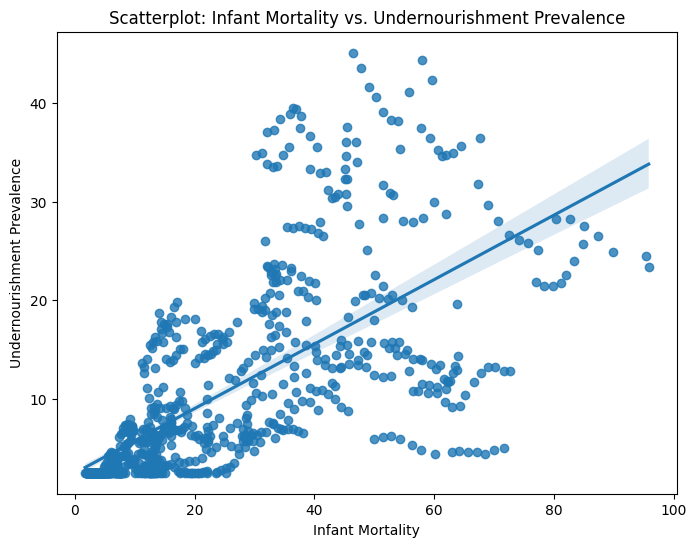

In [30]:
# Visualize the correlation using a scatterplot
plt.figure(figsize=(8, 6))
sns.regplot(x='infant_mortality', y='prev_undernourishment', data=df)
plt.title('Scatterplot: Infant Mortality vs. Undernourishment Prevalence')
plt.xlabel('Infant Mortality')
plt.ylabel('Undernourishment Prevalence')
plt.show()

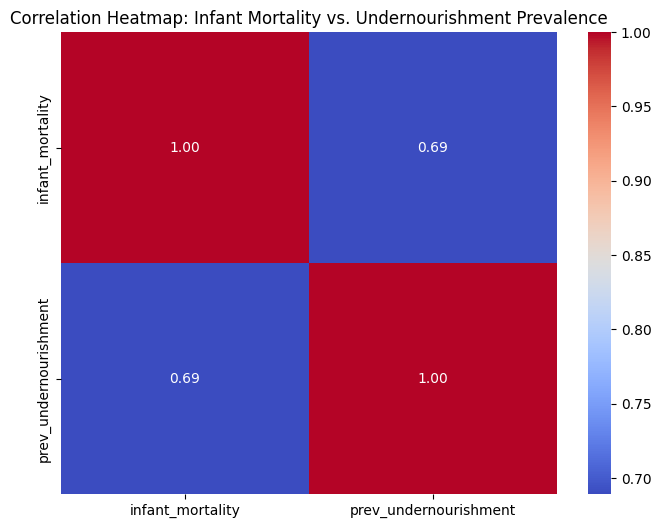

In [31]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['infant_mortality', 'prev_undernourishment']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Infant Mortality vs. Undernourishment Prevalence')
plt.show()

# Insights
* There is a statistically significant difference in average life expectancy by continent
* There is statistically significant evidence to suggest that life expectancy is different in developing and non-developed countries.
* As health expenditure increases, life expectancy tends to increase.
* As health expenditure increases, infant mortality tends to decrease.
* As infant mortality increases, prevalence of undernourishment tends to increase.
* Developing countries tend to have lower life expectancy.


# Build logistic regression model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
X = df.select_dtypes(include=['number']).drop(columns=['Year'])
y = df['is_developing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.711764705882353
